In [17]:
import pandas as pd
import numpy as np

# For data preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# For model training
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# For evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# For SHAP
import shap

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('mushrooms.csv')

In [25]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [138]:
df['class'].value_counts()

class
0    4208
1    3916
Name: count, dtype: int64

In [27]:
print(df.isnull().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [32]:
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class']) 

In [34]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,0,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,0,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,1,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [36]:
X = df.drop('class', axis=1)
y = df['class']

X_encoded = pd.get_dummies(X)

In [42]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [46]:
print(X_encoded.shape)

(8124, 117)


In [48]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=1, stratify=y)

# Then split the training+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=1, stratify=y_train_val)

In [56]:
class_weights = {0: 1, 1: 5}

In [58]:
dt_classifier = DecisionTreeClassifier(class_weight=class_weights, random_state=1)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 5}, random_state=1)

In [60]:
rf_classifier = RandomForestClassifier(class_weight=class_weights, n_estimators=100, random_state=1)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 5}, random_state=42)

In [67]:
import xgboost as xgb

# Calculate scale_pos_weight
neg, pos = np.bincount(y_train)
scale_pos_weight = pos / neg

xgb_classifier = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss', random_state=1)
xgb_classifier.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:46:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [71]:
class_weights = {0: 1, 1: 5}

# Create sample weights array based on y_train
sample_weights = np.array([class_weights[label] for label in y_train])

# Initialize XGBoost Classifier without scale_pos_weight
xgb_classifier = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# Fit the model with sample weights
xgb_classifier.fit(X_train, y_train, sample_weight=sample_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [73]:
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name):
    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    # Classification Report
    print(f"=== {model_name} ===")
    print("Training Accuracy:", train_accuracy)
    print("Validation Accuracy:", val_accuracy)
    print("\nValidation Classification Report:")
    print(classification_report(y_val, y_val_pred, target_names=['Edible', 'Poisonous']))
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

=== Decision Tree ===
Training Accuracy: 1.0
Validation Accuracy: 0.9975384615384615

Validation Classification Report:
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       842
   Poisonous       1.00      0.99      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



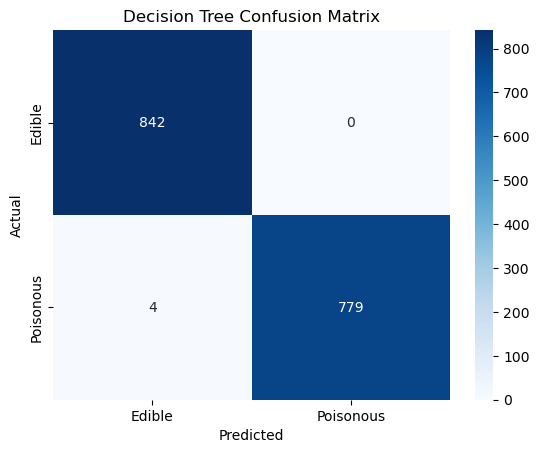

In [75]:
evaluate_model(dt_classifier, X_train, y_train, X_val, y_val, 'Decision Tree')


=== Random Forest ===
Training Accuracy: 1.0
Validation Accuracy: 1.0

Validation Classification Report:
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       842
   Poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



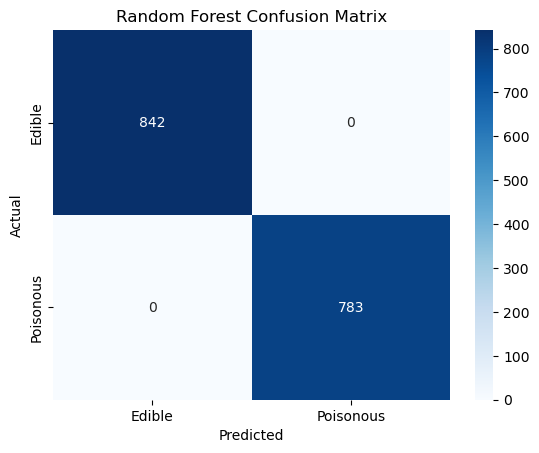

In [77]:
evaluate_model(rf_classifier, X_train, y_train, X_val, y_val, 'Random Forest')


=== XGBoost ===
Training Accuracy: 1.0
Validation Accuracy: 1.0

Validation Classification Report:
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       842
   Poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



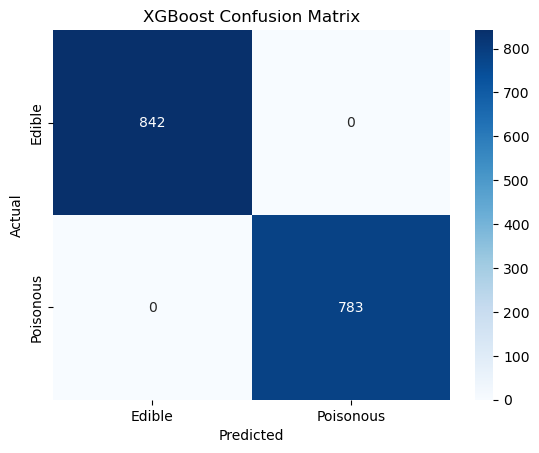

In [79]:
evaluate_model(xgb_classifier, X_train, y_train, X_val, y_val, 'XGBoost')


In [81]:
# Load JS visualization code to notebook
shap.initjs()

# Create a TreeExplainer
explainer = shap.TreeExplainer(xgb_classifier)


In [83]:
# Compute SHAP values
shap_values = explainer.shap_values(X_val)


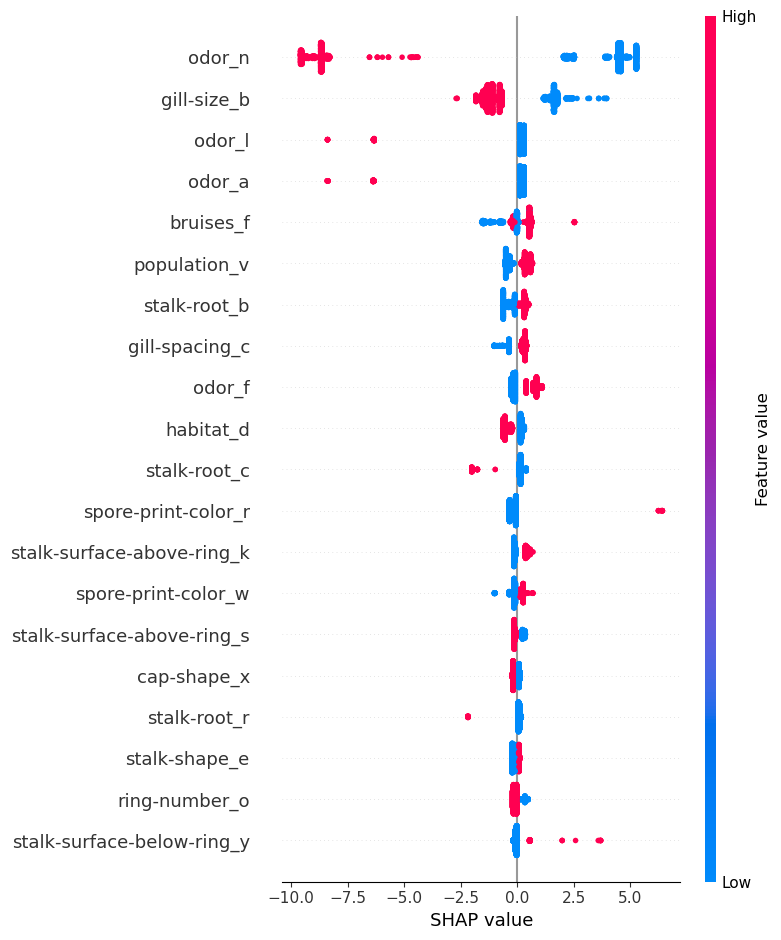

In [152]:
# Summary plot

import matplotlib.pyplot as plt

fig = plt.figure()
shap.summary_plot(shap_values, X_val,show=False)

# Customize the x-axis label
plt.xlabel("SHAP value")
plt.savefig("shap_summary_plot2.png", format="png", dpi=300)
plt.show()

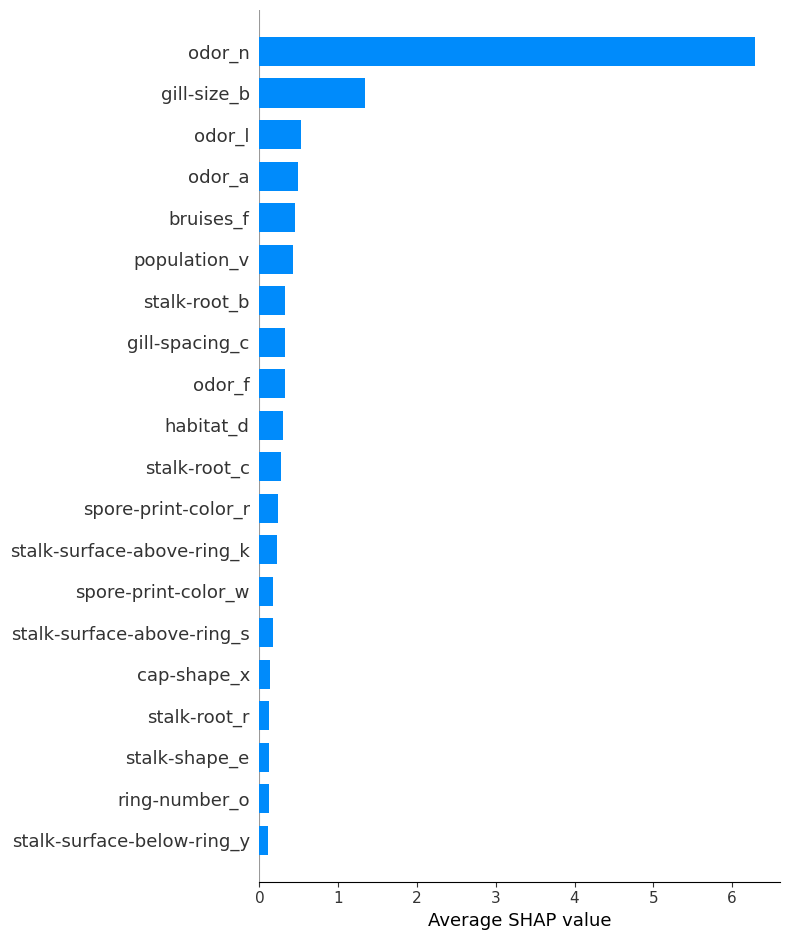

In [147]:

import matplotlib.pyplot as plt

fig = plt.figure()
shap.summary_plot(shap_values, X_val, plot_type="bar", show=False)

# Customize the x-axis label
plt.xlabel("Average SHAP value")
#plt.savefig("shap_summary_plot.png", format="png", dpi=300)
plt.show()

In [170]:
# Select an observation
index = 1  # Change index to explore different observations
observation = X_val.iloc[[index]]

# Compute SHAP values for this observation
shap_value_single = explainer.shap_values(observation)

# Force plot
shap.force_plot(explainer.expected_value, shap_value_single, observation)


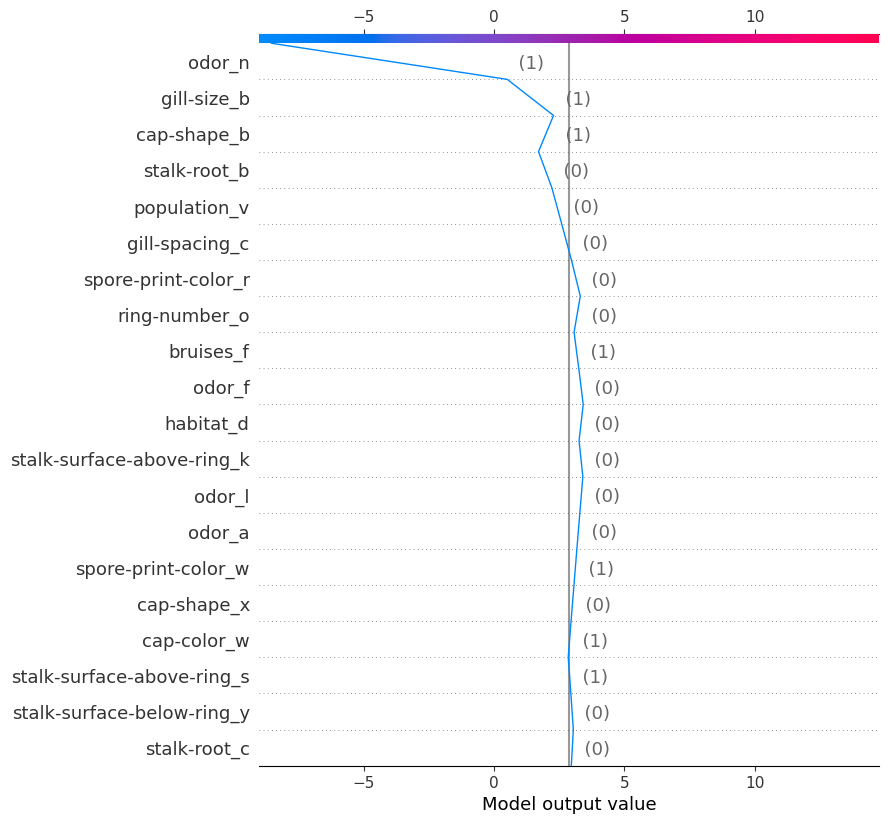

In [166]:
shap.decision_plot(explainer.expected_value, shap_value_single, observation)


Test Accuracy: 1.0


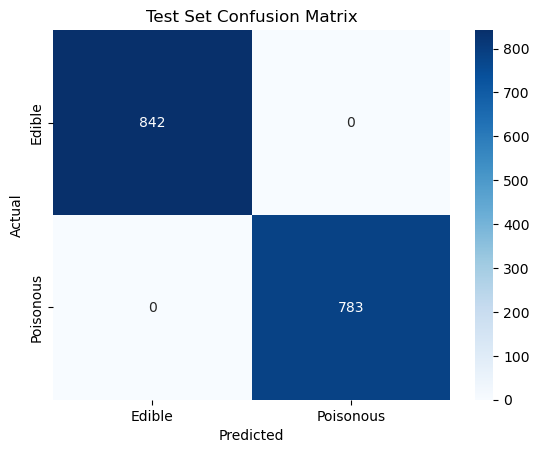

In [101]:
best_model = xgb_classifier
y_test_pred = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# Confusion Matrix
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Set Confusion Matrix')
plt.show()